## Import the libraries and read the MNIST dataset

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data
import time
mnist = input_data.read_data_sets("MNIST_data",one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


## Set the value of the Parameters

In [4]:
learning_rate =  0.01
epochs = 5
batch_size = 256
num_batches = int(mnist.train.num_examples/batch_size)
input_height = 28
input_weight = 28
n_classes = 10
dropout = 0.75
display_step = 1
filter_height = 5
filter_width = 5
depth_in = 1
depth_out1 = 64
depth_out2 = 128

## Input output definition

In [5]:
x = tf.placeholder(tf.float32,[None,28*28])
y = tf.placeholder(tf.float32,[None,n_classes])
keep_prob = tf.placeholder(tf.float32)

## Store the weights

In [6]:
weights = {
    'wc1' : tf.Variable(tf.random_normal([filter_height,filter_width,depth_in,depth_out1])),
    'wc2' : tf.Variable(tf.random_normal([filter_height,filter_width,depth_out1,depth_out2])),
    'wd1' : tf.Variable(tf.random_normal([int(input_height/4)*int(input_height/4)*depth_out2,1024])),
    'out' : tf.Variable(tf.random_normal([1024,n_classes]))
}

## Store the biases

In [7]:
biases = {
    'bc1' : tf.Variable(tf.random_normal([64])),
    'bc2' : tf.Variable(tf.random_normal([128])),
    'bd1' : tf.Variable(tf.random_normal([1024])),
    'out' : tf.Variable(tf.random_normal([n_classes]))
}

## Create the different layers

In [8]:
'''C O N VO L U T I O N L A Y E R'''
def conv2d(x,W,b,strides=1):
    x = tf.nn.conv2d(x,W,strides=[1,strides,strides,1],padding='SAME')
    x = tf.nn.bias_add(x,b)
    return tf.nn.relu(x)

'''P O O L I N G L A Y E R'''
def maxpool2d(x,stride=2):
    return tf.nn.max_pool(x,ksize=[1,stride,stride,1],strides=[1,stride,stride,1],padding='SAME')

## Create the feed forward model

In [9]:
def conv_net(x,weights,biases,dropout):
## Reshape the input in the 4 dimensional image
## 1st dimension - image index
## 2nd dimension - height
## 3rd dimension - width
## 4th dimension - depth
    x = tf.reshape(x,shape=[-1,28,28,1])
## Convolutional layer 1
    conv1 = conv2d(x,weights['wc1'],biases['bc1'])
    conv1 = maxpool2d(conv1,2)
## Convolutional layer 2
    conv2 = conv2d(conv1,weights['wc2'],biases['bc2'])
    conv2 = maxpool2d(conv2,2)
## Fully connected layer
    fc1 = tf.reshape(conv2,[-1,weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1,weights['wd1']),biases['bd1'])
    fc1 = tf.nn.relu(fc1)
## Apply Dropout
    fc1 = tf.nn.dropout(fc1,dropout)
## Output class prediction
    out = tf.add(tf.matmul(fc1,weights['out']),biases['out'])
    return out

## Defining the tensorflow Ops for different activities

In [10]:
pred = conv_net(x,weights,biases,keep_prob)
# Define loss fucntion and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))
## Initializing all variables
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Launch the execution Graph

Epoch: 0001 cost= 238009.562500000 Training accuracy 0.16406
Epoch: 0001 cost= 216827.656250000 Training accuracy 0.24219
Epoch: 0001 cost= 211567.796875000 Training accuracy 0.22656
Epoch: 0001 cost= 181884.140625000 Training accuracy 0.30078
Epoch: 0001 cost= 121409.609375000 Training accuracy 0.40234
Epoch: 0001 cost= 80428.492187500 Training accuracy 0.44922
Epoch: 0001 cost= 57031.304687500 Training accuracy 0.46094
Epoch: 0001 cost= 46199.949218750 Training accuracy 0.42578
Epoch: 0001 cost= 29586.031250000 Training accuracy 0.50781
Epoch: 0001 cost= 14748.716796875 Training accuracy 0.61328
Epoch: 0001 cost= 10745.384765625 Training accuracy 0.65234
Epoch: 0001 cost= 11492.960937500 Training accuracy 0.62891
Epoch: 0001 cost= 10648.891601562 Training accuracy 0.59375
Epoch: 0001 cost= 10790.363281250 Training accuracy 0.59766
Epoch: 0001 cost= 9402.602539062 Training accuracy 0.67578
Epoch: 0001 cost= 6969.146484375 Training accuracy 0.67188
Epoch: 0001 cost= 6501.282226562 Trai

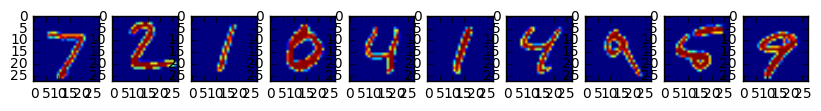

In [11]:
start_time = time.time()
with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        for j in range(num_batches):
            
            batch_x,batch_y = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x:batch_x,y:batch_y,keep_prob:dropout})
            loss,acc = sess.run([cost,accuracy],feed_dict={x:batch_x,y:batch_y,keep_prob: 1.})
            if epochs % display_step == 0:
                print("Epoch:", '%04d' % (i+1),
                     "cost=", "{:.9f}".format(loss),
                     "Training accuracy","{:.5f}".format(acc))
    print('Optimization Completed')
    
    y1 = sess.run(pred,feed_dict={x:mnist.test.images[:256],keep_prob: 1})
    test_classes = np.argmax(y1,1)
    print('Testing Accuracy:',sess.run(accuracy,feed_dict={x:mnist.test.images[:256],y:mnist.test.labels[:256],keep_prob: 1}))
    f, a = plt.subplots(1, 10, figsize=(10,2))
    
    for i in range(10):
        a[i].imshow(np.reshape(mnist.test.images[i],(28,28)))
        print(test_classes[i])

end_time = time.time()
print('Total processing time:',end_time - start_time)